# Camtrack

Este notebook se centra en encontrar la manera óptima de hacer pose tracking a un video.

In [1]:
import os
workpath = 'C:/Users/Legion/TFM/Tareas'
os.chdir(workpath)

In [2]:
import cv2
import time
import urllib
import mediapipe as mp
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from IPython.display import Image as IPyImage
from ultralytics import YOLO
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Webcam Track


## YOLO

In [2]:
model = YOLO('yolov8l-pose.pt')

In [ ]:
cap = cv2.VideoCapture(0)

axes = None
num_frames = 60
processed_imgs = []

for i in range(num_frames):
    # Load frame from the camera
    ret, frame = cap.read()
    
    # Run the model
    result = model(frame, verbose=False)
    # working with the frame after the model
    annotated_image_bgr = result[0].plot()
    annotated_image_rgb = annotated_image_bgr[:,:, ::-1]  # Convert BGR to RGB
    
    img = Image.fromarray(np.uint8(annotated_image_rgb))
    processed_imgs.append(img)
    cv2.imshow("test", annotated_image_bgr)
    cv2.waitKey(1)

## MediaPipe

In [99]:
# VIDEO FEED
# check the cam works

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    # stating a way of stopping the camera
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

# Setup mediapipe instance
# running the whit the model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
    
        # Recolor image to RGB
        if ret == True:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
      
            # Make detection
            results = pose.process(image)
            
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(148,7,240), thickness=2, circle_radius=2), 
                                      mp_drawing.DrawingSpec(color=(149,158,0), thickness=2, circle_radius=2)
                                     )               
        
            cv2.imshow('Mediapipe Feed', image)

            if cv2.waitKey(25) == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

### Understanding coordinates

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB
        if ret == True:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(148,7,240), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(149,158,0), thickness=2, circle_radius=2)
                                     )               
            try:
                    
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                finger = [landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].y,
                          landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].z]
            
                # Visualize coordinates
                cv2.putText(image, 'x: '+str(round(finger[0],2)),
                            tuple([10,10]), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )
                cv2.putText(image, 'y: '+str(round(finger[1],2)), 
                            tuple([10,25]), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )
                cv2.putText(image, 'z: '+str(round(finger[2],2)), 
                            tuple([10,50]), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )
            except:
                pass
            cv2.imshow('Mediapipe Feed', image)

            if cv2.waitKey(25) == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

In [25]:
mp_drawing.DrawingSpec??

Init signature:
mp_drawing.DrawingSpec(
    color: Tuple[int, int, int] = (224, 224, 224),
    thickness: int = 2,
    circle_radius: int = 2,
) -> None
Docstring:      DrawingSpec(color: Tuple[int, int, int] = (224, 224, 224), thickness: int = 2, circle_radius: int = 2)
Source:        
@dataclasses.dataclass
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 2
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 2
File:           c:\users\bruno\tfm\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Type:           type
Subclasses:     

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

# Video Track

## Open video
 
Usar opencv para abrir un video en vez de la cámara (se debe pasar la dirección del video)

In [15]:
vid = cv2.VideoCapture('VideosTR/Fondo1.mp4')

if (vid.isOpened() == False):
    print('No se pudo abrir el video')

while vid.isOpened():
    ret, frame = vid.read()

    if ret == True:
        cv2.imshow('frame', frame)

        if cv2.waitKey(25) == ord('q'):
            break

    else:
        break

vid.release()
cv2.destroyAllWindows()

## MediaPipe over video

In [6]:
cap = cv2.VideoCapture(workpath+'/VideosTR/Flexiones4_1.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.7 , min_tracking_confidence=0.7) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        # Recolor image to RGB
        if ret == True:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
      
            # Make detection
            results = pose.process(image)
            
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(148,7,240), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(149,158,0), thickness=2, circle_radius=2) 
                                     )               
        
            cv2.imshow('Mediapipe Feed', image)

            if cv2.waitKey(25) == ord('q'):
                break
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

In [4]:
# Data retrieval from the processed video

# Landmark list/dict?
landmarks = results.pose_landmarks.landmark


## Function definition for Estimate Pose of video

Aquí figura cómo empieza la idea de sacar la información importante de los videos para tener un Dataframe con el que estudiar las poses. El producto final se sigue trabajando en el archivo _excercise\_classification.py_ que es donde se usan para el proyecto.

In [3]:
def retrieve_data_video(path):
    cap = cv2.VideoCapture(path)
    landmarks_raw = []
    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5 , min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
        
            # Recolor image to RGB
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
          
                # Make detection
                results = pose.process(image)
                # if detection works, record the landmarks in a list to work with it later
                try:
                    landmarks_frame = results.pose_landmarks.landmark
                    landmarks_raw.append(landmarks_frame)
                except:
                    pass
                # Recolor back to BGR
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
                # Render detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(148,7,240), thickness=2, circle_radius=2), 
                                        mp_drawing.DrawingSpec(color=(149,158,0), thickness=2, circle_radius=2) 
                                         )               
                # Visualize how it works
                cv2.imshow('Mediapipe Feed', image)

                if cv2.waitKey(25) == ord('q'):
                    break
            else:
                break
        cap.release()
        cv2.destroyAllWindows()
    return landmarks_raw

In [2]:
def retrieve_data_video(path):
    cap = cv2.VideoCapture(path)
    landmarks_raw = {'frame': [],
                    'landmarks': []}
    i = 0
    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5 , min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
        
            # Recolor image to RGB
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
          
                # Make detection
                results = pose.process(image)
                try:
                    landmarks_frame = results.pose_landmarks.landmark
                    landmarks_raw['landmarks'].append(landmarks_frame)
                    landmarks_raw['frame'].append(i)
                    i += 1
                except:
                    pass
                # Recolor back to BGR
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
                # Render detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(148,7,240), thickness=2, circle_radius=2), 
                                        mp_drawing.DrawingSpec(color=(149,158,0), thickness=2, circle_radius=2) 
                                         )               
        
                cv2.imshow('Mediapipe Feed', image)

                if cv2.waitKey(25) == ord('q'):
                    break
            else:
                break
        cap.release()
        cv2.destroyAllWindows()
    return landmarks_raw

In [ ]:
data_excercise = retrieve_data_video(workpath+'/VideosTR/Dominadas5.mp4')

In [ ]:
print(data_excercise)

### Take important information as a dataframe

Assume that the important information relies on the body, so we get only the nose for the head, and then the body parts

In [47]:
def landmarks_to_dataframe(rawdata):
    landmarks_dict = {
    'NOSE_x' : [],
    'NOSE_y' : [],
    'NOSE_z' : [],
    'LEFT_SHOULDER_x' : [],
    'LEFT_SHOULDER_y' : [],
    'LEFT_SHOULDER_z' : [],
    'RIGHT_SHOULDER_x' : [],
    'RIGHT_SHOULDER_y' : [],
    'RIGHT_SHOULDER_z' : [],
    'LEFT_ELBOW_x' : [],
    'LEFT_ELBOW_y' : [],
    'LEFT_ELBOW_z' : [],
    'RIGHT_ELBOW_x' : [],
    'RIGHT_ELBOW_y' : [],
    'RIGHT_ELBOW_z' : [],
    'LEFT_WRIST_x' : [],
    'LEFT_WRIST_y' : [],
    'LEFT_WRIST_z' : [],
    'RIGHT_WRIST_x' : [],
    'RIGHT_WRIST_y' : [],
    'RIGHT_WRIST_z' : [],
    'LEFT_PINKY_x' : [],
    'LEFT_PINKY_y' : [],
    'LEFT_PINKY_z' : [],
    'RIGHT_PINKY_x' : [],
    'RIGHT_PINKY_y' : [],
    'RIGHT_PINKY_z' : [],
    'LEFT_INDEX_x' : [],
    'LEFT_INDEX_y' : [],
    'LEFT_INDEX_z' : [],
    'RIGHT_INDEX_x' : [],
    'RIGHT_INDEX_y' : [],
    'RIGHT_INDEX_z' : [],
    'LEFT_THUMB_x' : [],
    'LEFT_THUMB_y' : [],
    'LEFT_THUMB_z' : [],
    'RIGHT_THUMB_x' : [],
    'RIGHT_THUMB_y' : [],
    'RIGHT_THUMB_z' : [],
    'LEFT_HIP_x' : [],
    'LEFT_HIP_y' : [],
    'LEFT_HIP_z' : [],
    'RIGHT_HIP_x' : [],
    'RIGHT_HIP_y' : [],
    'RIGHT_HIP_z' : [],
    'LEFT_KNEE_x' : [],
    'LEFT_KNEE_y' : [],
    'LEFT_KNEE_z' : [],
    'RIGHT_KNEE_x' : [],
    'RIGHT_KNEE_y' : [],
    'RIGHT_KNEE_z' : [],
    'LEFT_ANKLE_x' : [],
    'LEFT_ANKLE_y' : [],
    'LEFT_ANKLE_z' : [],
    'RIGHT_ANKLE_x' : [],
    'RIGHT_ANKLE_y' : [],
    'RIGHT_ANKLE_z' : []
    }
    for index in range(len(rawdata)):
        landmarks_dict['NOSE_x'].append(rawdata[index][mp_pose.PoseLandmark.NOSE.value].x)
        landmarks_dict['NOSE_y'].append(1-rawdata[index][mp_pose.PoseLandmark.NOSE.value].y)
        landmarks_dict['NOSE_z'].append(rawdata[index][mp_pose.PoseLandmark.NOSE.value].z)
        landmarks_dict['LEFT_SHOULDER_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)
        landmarks_dict['LEFT_SHOULDER_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)
        landmarks_dict['LEFT_SHOULDER_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_SHOULDER.value].z)
        landmarks_dict['RIGHT_SHOULDER_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x)
        landmarks_dict['RIGHT_SHOULDER_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
        landmarks_dict['RIGHT_SHOULDER_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z)
        landmarks_dict['LEFT_ELBOW_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_ELBOW.value].x)
        landmarks_dict['LEFT_ELBOW_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_ELBOW.value].y)
        landmarks_dict['LEFT_ELBOW_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_ELBOW.value].z)
        landmarks_dict['RIGHT_ELBOW_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_ELBOW.value].x)
        landmarks_dict['RIGHT_ELBOW_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_ELBOW.value].y)
        landmarks_dict['RIGHT_ELBOW_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_ELBOW.value].z)
        landmarks_dict['LEFT_WRIST_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_WRIST.value].x)
        landmarks_dict['LEFT_WRIST_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_WRIST.value].y)
        landmarks_dict['LEFT_WRIST_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_WRIST.value].z)
        landmarks_dict['RIGHT_WRIST_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_WRIST.value].x)
        landmarks_dict['RIGHT_WRIST_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_WRIST.value].y)
        landmarks_dict['RIGHT_WRIST_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_WRIST.value].z)
        landmarks_dict['LEFT_PINKY_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_PINKY.value].x)
        landmarks_dict['LEFT_PINKY_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_PINKY.value].y)
        landmarks_dict['LEFT_PINKY_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_PINKY.value].z)
        landmarks_dict['RIGHT_PINKY_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_PINKY.value].x)
        landmarks_dict['RIGHT_PINKY_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_PINKY.value].y)
        landmarks_dict['RIGHT_PINKY_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_PINKY.value].z)
        landmarks_dict['LEFT_INDEX_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_INDEX.value].x)
        landmarks_dict['LEFT_INDEX_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_INDEX.value].y)
        landmarks_dict['LEFT_INDEX_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_INDEX.value].z)
        landmarks_dict['RIGHT_INDEX_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_INDEX.value].x)
        landmarks_dict['RIGHT_INDEX_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_INDEX.value].y)
        landmarks_dict['RIGHT_INDEX_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_INDEX.value].z)
        landmarks_dict['LEFT_THUMB_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_THUMB.value].x)
        landmarks_dict['LEFT_THUMB_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_THUMB.value].y)
        landmarks_dict['LEFT_THUMB_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_THUMB.value].z)
        landmarks_dict['RIGHT_THUMB_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_THUMB.value].x)
        landmarks_dict['RIGHT_THUMB_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_THUMB.value].y)
        landmarks_dict['RIGHT_THUMB_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_THUMB.value].z)
        landmarks_dict['LEFT_HIP_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_HIP.value].x)
        landmarks_dict['LEFT_HIP_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_HIP.value].y)
        landmarks_dict['LEFT_HIP_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_HIP.value].z)
        landmarks_dict['RIGHT_HIP_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_HIP.value].x)
        landmarks_dict['RIGHT_HIP_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_HIP.value].y)
        landmarks_dict['RIGHT_HIP_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_HIP.value].z)
        landmarks_dict['LEFT_KNEE_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_KNEE.value].x)
        landmarks_dict['LEFT_KNEE_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_KNEE.value].y)
        landmarks_dict['LEFT_KNEE_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_KNEE.value].z)
        landmarks_dict['RIGHT_KNEE_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_KNEE.value].x)
        landmarks_dict['RIGHT_KNEE_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_KNEE.value].y)
        landmarks_dict['RIGHT_KNEE_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_KNEE.value].z)
        landmarks_dict['LEFT_ANKLE_x'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_ANKLE.value].x)
        landmarks_dict['LEFT_ANKLE_y'].append(1-rawdata[index][mp_pose.PoseLandmark.LEFT_ANKLE.value].y)
        landmarks_dict['LEFT_ANKLE_z'].append(rawdata[index][mp_pose.PoseLandmark.LEFT_ANKLE.value].z)
        landmarks_dict['RIGHT_ANKLE_x'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_ANKLE.value].x)
        landmarks_dict['RIGHT_ANKLE_y'].append(1-rawdata[index][mp_pose.PoseLandmark.RIGHT_ANKLE.value].y)
        landmarks_dict['RIGHT_ANKLE_z'].append(rawdata[index][mp_pose.PoseLandmark.RIGHT_ANKLE.value].z)
    return pd.DataFrame(landmarks_dict)
    
        


In [48]:
def minmaxing_rows(df):
    standarized_df = df.subtract(
        df.min(axis=1), axis=0).divide(
        df.max(axis=1) - df.min(axis=1), axis=0).combine_first(df)
    return standarized_df


def standarize_coordinates(dataframe):
    sorted_cols = list(dataframe.columns)
    x_coord = dataframe[[xcol for xcol in dataframe.columns if '_x' in xcol]]
    y_coord = dataframe[[ycol for ycol in dataframe.columns if '_y' in ycol]]
    z_coord = dataframe[[zcol for zcol in dataframe.columns if '_z' in zcol]]

    x_coord_ref = x_coord.sub(x_coord['NOSE_x'], axis=0)
    y_coord_ref = y_coord.sub(y_coord['NOSE_y'], axis=0)
    z_coord_ref = z_coord.sub(z_coord['NOSE_z'], axis=0)

    minmaxed_x_coord = minmaxing_rows(x_coord_ref)
    minmaxed_y_coord = minmaxing_rows(y_coord_ref)
    minmaxed_z_coord = minmaxing_rows(z_coord_ref)

    df_scaled_xy = minmaxed_x_coord.join(minmaxed_y_coord, how='inner')
    df_scaled = df_scaled_xy.join(minmaxed_z_coord, how='inner')
    return df_scaled[sorted_cols]
    

In [73]:
df_prueba = landmarks_to_dataframe(data_excercise)
df_prueba

,NOSE_x,NOSE_y,NOSE_z,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,...,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z
0,0.426810,0.742264,-0.002148,0.340020,0.720072,0.281370,0.312394,0.746158,-0.230297,0.289846,...,0.083321,0.268826,0.516270,-0.256400,0.320313,0.415744,0.135102,0.301445,0.412816,-0.232912
1,0.426345,0.733892,0.188660,0.338940,0.719882,0.436640,0.310794,0.751852,-0.084062,0.294773,...,-0.187273,0.271744,0.575112,-0.597546,0.443365,0.370248,-0.413845,0.348055,0.446590,-0.755721
2,0.423575,0.731801,0.193181,0.338329,0.719855,0.457636,0.308754,0.753221,-0.093815,0.298255,...,-0.055853,0.327630,0.551428,-0.407695,0.424299,0.379990,-0.165617,0.430777,0.409913,-0.494552
3,0.423651,0.732685,0.183839,0.338211,0.717353,0.454968,0.306377,0.753999,-0.064089,0.301865,...,-0.190655,0.309694,0.574388,-0.528550,0.444851,0.389847,-0.432071,0.380602,0.452812,-0.741609
4,0.424298,0.733369,0.169940,0.338060,0.716981,0.447431,0.305708,0.754056,-0.082623,0.301584,...,-0.158289,0.305291,0.575474,-0.526053,0.426978,0.434039,-0.365934,0.372765,0.452065,-0.746288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.424719,0.720506,0.074874,0.343634,0.722405,0.319567,0.318146,0.755301,-0.212787,0.298431,...,0.107200,0.300361,0.499283,-0.145493,0.425976,0.415148,0.115818,0.425983,0.373623,-0.168242
168,0.424830,0.720004,0.064116,0.343664,0.721514,0.327626,0.318217,0.754917,-0.216599,0.299196,...,0.125288,0.302505,0.502056,-0.144405,0.425760,0.413090,0.149263,0.419220,0.377687,-0.123557
169,0.424893,0.718679,0.146443,0.343723,0.719852,0.381327,0.318292,0.754699,-0.174613,0.302315,...,0.149290,0.288721,0.488716,-0.136144,0.412232,0.415610,0.211513,0.424798,0.365877,-0.146246
170,0.424605,0.716281,0.145635,0.344810,0.718591,0.378962,0.318331,0.754322,-0.151285,0.303173,...,0.069187,0.276310,0.483114,-0.121559,0.433815,0.375094,0.084358,0.416262,0.365576,-0.145885


In [74]:
df_scalado_prueba = standarize_coordinates(df_prueba)
df_scalado_prueba

,NOSE_x,NOSE_y,NOSE_z,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,...,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z
0,1.000000,0.988319,0.567122,0.594256,0.921746,0.910609,0.465105,1.0,0.290715,0.359696,...,0.670669,0.261427,0.310355,0.259091,0.502130,0.008785,0.733402,0.413920,0.000000,0.287547
1,0.930891,0.952936,0.792026,0.575978,0.916222,1.000000,0.461691,1.0,0.563302,0.396636,...,0.476742,0.303128,0.536850,0.132657,1.000000,0.000000,0.286722,0.612991,0.200056,0.000000
2,0.969159,0.942611,0.722266,0.604081,0.910604,1.000000,0.477421,1.0,0.420859,0.432460,...,0.460727,0.558263,0.459337,0.091218,0.972258,0.000000,0.345451,1.000000,0.080175,0.000000
3,0.916513,0.941471,0.773413,0.580052,0.899367,1.000000,0.454690,1.0,0.566215,0.436925,...,0.460441,0.467753,0.506770,0.178057,1.000000,0.000000,0.258686,0.746989,0.172909,0.000000
4,0.982412,0.935355,0.767541,0.620579,0.884147,1.000000,0.484839,1.0,0.555964,0.467535,...,0.492577,0.483087,0.441961,0.184495,0.993658,0.000000,0.318629,0.766193,0.056327,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.994877,0.908834,0.517301,0.666086,0.913812,0.894374,0.562737,1.0,0.074013,0.482795,...,0.567115,0.490620,0.329229,0.177714,0.999974,0.108795,0.580395,1.000000,0.000000,0.142658
168,0.996230,0.907450,0.510754,0.666912,0.911452,0.927352,0.563663,1.0,0.066955,0.486490,...,0.607464,0.499916,0.329691,0.181089,1.000000,0.093851,0.645367,0.973468,0.000000,0.214050
169,0.864694,0.907361,0.548598,0.577054,0.910378,0.850936,0.486932,1.0,0.135342,0.430317,...,0.552262,0.382143,0.315925,0.184858,0.819826,0.127908,0.632355,0.864357,0.000000,0.171855
170,0.963581,0.902144,0.579717,0.648051,0.908085,0.878559,0.543346,1.0,0.199426,0.483404,...,0.481803,0.377184,0.302352,0.237499,1.000000,0.024486,0.501234,0.930591,0.000000,0.206343


## Visualizing data points

Estudiar que los puntos de referencia que estamos tomando mantienen la información como queremos.

In [70]:
def plot_landmarks(df, frame):
    x_coord = df[[xcol for xcol in df.columns if '_x' in xcol]].iloc[frame]
    y_coord = df[[ycol for ycol in df.columns if '_y' in ycol]].iloc[frame]
    plt.plot(x_coord['NOSE_x'], y_coord['NOSE_y'], 'bo')
    plt.plot([x_coord['LEFT_WRIST_x'],x_coord['LEFT_ELBOW_x'], x_coord['LEFT_SHOULDER_x'], 
              x_coord['RIGHT_SHOULDER_x'], x_coord['RIGHT_ELBOW_x'], x_coord['RIGHT_WRIST_x']],
             [y_coord['LEFT_WRIST_y'],y_coord['LEFT_ELBOW_y'], y_coord['LEFT_SHOULDER_y'],
             y_coord['RIGHT_SHOULDER_y'], y_coord['RIGHT_ELBOW_y'], y_coord['RIGHT_WRIST_y']], 'r-o')
    
    plt.plot([x_coord['LEFT_HIP_x'],x_coord['RIGHT_HIP_x']] , [y_coord['LEFT_HIP_y'],y_coord['RIGHT_HIP_y']], 'g-o')
    
    plt.plot([x_coord['LEFT_ANKLE_x'],x_coord['LEFT_KNEE_x'], x_coord['LEFT_HIP_x'], 
              x_coord['RIGHT_HIP_x'], x_coord['RIGHT_KNEE_x'], x_coord['RIGHT_ANKLE_x']],
             [y_coord['LEFT_ANKLE_y'],y_coord['LEFT_KNEE_y'], y_coord['LEFT_HIP_y'],
             y_coord['RIGHT_HIP_y'], y_coord['RIGHT_KNEE_y'], y_coord['RIGHT_ANKLE_y']], 'k-o')

    plt.show()

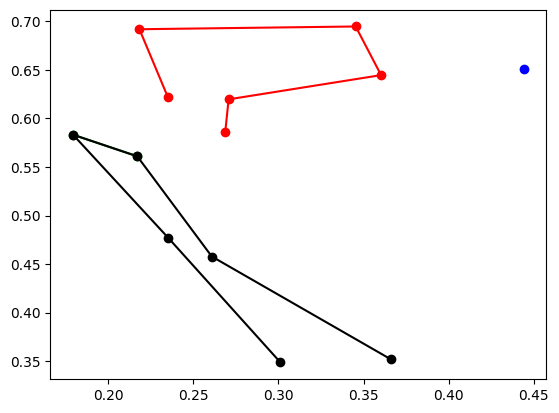

In [75]:
plot_landmarks(df_prueba, 140)